# Some details about the given data

In [1]:
import warnings

import numpy as np
from datasets import load_dataset, load_metric
import transformers
import datasets
import random
import pandas as pd
from IPython.display import display, HTML

warnings.filterwarnings('ignore')

In [5]:
data = pd.read_table("../data/raw/filtered.tsv")

In [6]:
data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [10]:
# sorting by reference toxicity
sorted_by_ref_data = data.sort_values('ref_tox')
sorted_by_ref_data.head()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
489393,489393,"' ""I went from place to place telling friends ...","son of a bitch, I used to go from place to pla...",0.605479,0.243902,0.000033,0.998660
358271,358271,"And the best thing is, even if they weren't wa...","and the best part is, even though it wasn't al...",0.617393,0.390244,0.000033,0.993636
497217,497217,Bill thought we were ready to present to the f...,bill thought we were ready to present it befor...,0.668596,0.288660,0.000034,0.986688
9637,9637,"So if he wants to say ""table,"" he could say ""l...","so if he wants to say ""table..."" he can either...",0.841094,0.064103,0.000034,0.973828
516956,516956,But after listening to Gailet he decided he ha...,"but after hearing the talk of Gailet, he decid...",0.718270,0.125984,0.000034,0.989160


In [11]:
sorted_by_ref_data.tail()

,Unnamed: 0,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
70934,70934,My idiot friend here brought marijuana... - on...,my friend here took a marijuana...,0.715508,0.396552,0.999722,0.000161
318050,318050,And don't let those idiots in radiology hold y...,don't let them fool you in radiology.,0.711188,0.283019,0.999723,0.000874
258368,258368,Salina could be with that stupid cop.,Salina could be with the cop.,0.774944,0.210526,0.999723,0.000500
101676,101676,You have to send those idiots back in.,you have to get those guys back there.,0.622852,0.000000,0.999723,0.000115
551255,551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599


## Conclusion 1
Some reference sentences do not have any toxic words or meanings, but some translated sentences transformed into toxic

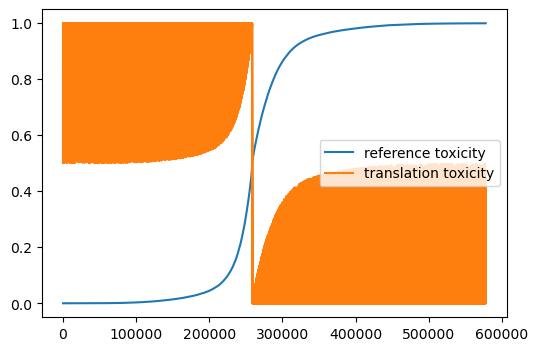

In [20]:
# let me make a diagram that shows this transition from non-toxic to toxic sentences
# and compare toxicity level of reference and translation

import matplotlib.pyplot as plt
import numpy as np

x_points = np.arange(0, len(sorted_by_ref_data))
y_references = sorted_by_ref_data['ref_tox']
y_translation = sorted_by_ref_data['trn_tox']

fig = plt.figure(figsize=(6, 4))
plt.plot(x_points, y_references, label="reference toxicity")
plt.plot(x_points, y_translation, label="translation toxicity")
plt.legend()
plt.show()
fig.savefig("../reports/figures/sorted_toxicity.png", dpi=fig.dpi)

I need to make all references as toxic sentences and all translation as non-toxic

In [30]:
new_sorted = pd.read_csv('../data/internal/data.csv')
new_sorted.head()

,Unnamed: 0,Unnamed: 0.1,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,362778,523541,523541,"At the sea would she suck, and drink its depth...","he wants the sands of the sea, and its depth i...",0.733019,0.040984,0.995119,0.000058
1,362780,283145,283145,She's horrible.,he's bad.,0.629838,0.375000,0.995119,0.012569
2,362779,254399,254399,She's horrible.,it's terrible.,0.881564,0.062500,0.995119,0.000142
3,362783,347106,347106,Too much damn violence in the 'hood.,there was too much violence.,0.797933,0.216216,0.995119,0.000163
4,362784,362687,362687,Damn it. I... I was...,"hell, I was so sure.",0.666942,0.086957,0.995119,0.001208


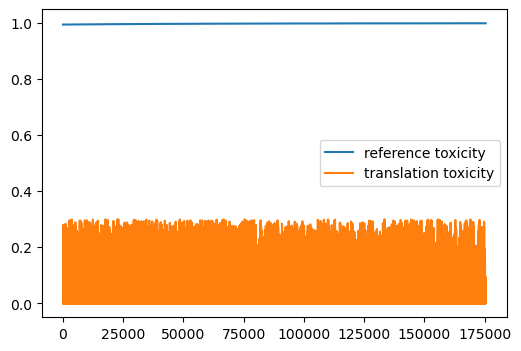

In [31]:
# and display the result after preprocessing

x_points = np.arange(0, len(new_sorted))
y_references = new_sorted['ref_tox']
y_translation = new_sorted['trn_tox']

fig = plt.figure(figsize=(6, 4))
plt.plot(x_points, y_references, label="reference toxicity")
plt.plot(x_points, y_translation, label="translation toxicity")
plt.legend()
plt.show()

577777